In [2]:
import json
import pandas as pd
import sqlite3
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
with open('housing.json', 'r') as f:
    data = json.load(f)


N_data = pd.json_normalize(data, sep='_')  # normalize JSON

# Store data into an SQLite database using SQLAlchemy
engine = create_engine('sqlite:///mydatabase.db')  

# Create a connection to the database
conn = sqlite3.connect('mydatabase.db')

# Store the DataFrame into the database (a new table called 'data_table')
N_data.to_sql('data_table', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

#load data from the SQLite database into pandas DataFrame
conn = sqlite3.connect('mydatabase.db')


df = pd.read_sql('SELECT * FROM data_table', conn)


conn.close()


print(df.head())  



  Local Authority        Scenario year_2020 year_2021 year_2022 year_2023  \
0          Carlow        Baseline       409       395       382       401   
1           Cavan        Baseline       462       451       446       474   
2       Cork City        Baseline     1,544     1,560     1,485     1,467   
3       Cork City  High migration     1,530     1,589     1,559     1,588   
4           Clare        Baseline       623       591       580       596   

  year_2024 year_2025 year_2026 year_2027  ... year_2031 year_2032 year_2033  \
0       399       414       398       390  ...       423       411       423   
1       490       472       454       471  ...       496       511       527   
2     1,408     1,356     1,390     1,386  ...     1,410     1,384     1,394   
3     1,579     1,579     1,624     1,631  ...     1,692     1,674     1,691   
4       599       592       567       576  ...       583       601       592   

  year_2034 year_2035 year_2036 year_2037 year_2038 year

In [4]:
df

,Local Authority,Scenario,year_2020,year_2021,year_2022,year_2023,year_2024,year_2025,year_2026,year_2027,...,year_2031,year_2032,year_2033,year_2034,year_2035,year_2036,year_2037,year_2038,year_2039,year_2040
0,Carlow,Baseline,409,395,382,401,399,414,398,390,...,423,411,423,402,424,388,395,405,382,392
1,Cavan,Baseline,462,451,446,474,490,472,454,471,...,496,511,527,528,507,505,499,491,481,448
2,Cork City,Baseline,"1,544","1,560","1,485","1,467","1,408","1,356","1,390","1,386",...,"1,410","1,384","1,394","1,364","1,345","1,335","1,298","1,282","1,240","1,204"
3,Cork City,High migration,"1,530","1,589","1,559","1,588","1,579","1,579","1,624","1,631",...,"1,692","1,674","1,691","1,669","1,656","1,652","1,620","1,610","1,573","1,542"
4,Clare,Baseline,623,591,580,596,599,592,567,576,...,583,601,592,562,576,531,544,516,467,458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Tipperary,50:50 City,544,535,512,528,509,519,508,492,...,531,523,497,496,502,457,437,392,373,348
120,Waterford,50:50 City,611,594,604,616,628,620,620,645,...,697,696,700,726,683,679,681,677,687,652
121,Westmeath,50:50 City,516,510,468,456,460,457,463,441,...,460,430,429,417,413,413,379,368,352,334
122,Wexford,50:50 City,518,501,507,569,573,544,537,558,...,587,601,617,646,553,558,562,549,546,462


In [5]:
#check missing values in case there is one replace with the mean
print(df.isnull().sum())


Local Authority    0
Scenario           0
year_2020          0
year_2021          0
year_2022          0
year_2023          0
year_2024          0
year_2025          0
year_2026          0
year_2027          0
year_2028          0
year_2029          0
year_2030          0
year_2031          0
year_2032          0
year_2033          0
year_2034          0
year_2035          0
year_2036          0
year_2037          0
year_2038          0
year_2039          0
year_2040          0
dtype: int64


In [6]:
#check the type of data to make any adjust needed
df.dtypes

Local Authority    object
Scenario           object
year_2020          object
year_2021          object
year_2022          object
year_2023          object
year_2024          object
year_2025          object
year_2026          object
year_2027          object
year_2028          object
year_2029          object
year_2030          object
year_2031          object
year_2032          object
year_2033          object
year_2034          object
year_2035          object
year_2036          object
year_2037          object
year_2038          object
year_2039          object
year_2040          object
dtype: object

In [7]:
for col in df.columns[2:25]:
    df[col] = df[col].str.replace(',', '', regex=False).astype(float)




print(df)

    Local Authority        Scenario  year_2020  year_2021  year_2022  \
0            Carlow        Baseline      409.0      395.0      382.0   
1             Cavan        Baseline      462.0      451.0      446.0   
2         Cork City        Baseline     1544.0     1560.0     1485.0   
3         Cork City  High migration     1530.0     1589.0     1559.0   
4             Clare        Baseline      623.0      591.0      580.0   
..              ...             ...        ...        ...        ...   
119       Tipperary      50:50 City      544.0      535.0      512.0   
120       Waterford      50:50 City      611.0      594.0      604.0   
121       Westmeath      50:50 City      516.0      510.0      468.0   
122         Wexford      50:50 City      518.0      501.0      507.0   
123         Wicklow      50:50 City      734.0      753.0      705.0   

     year_2023  year_2024  year_2025  year_2026  year_2027  ...  year_2031  \
0        401.0      399.0      414.0      398.0      390.

In [8]:
df

,Local Authority,Scenario,year_2020,year_2021,year_2022,year_2023,year_2024,year_2025,year_2026,year_2027,...,year_2031,year_2032,year_2033,year_2034,year_2035,year_2036,year_2037,year_2038,year_2039,year_2040
0,Carlow,Baseline,409.0,395.0,382.0,401.0,399.0,414.0,398.0,390.0,...,423.0,411.0,423.0,402.0,424.0,388.0,395.0,405.0,382.0,392.0
1,Cavan,Baseline,462.0,451.0,446.0,474.0,490.0,472.0,454.0,471.0,...,496.0,511.0,527.0,528.0,507.0,505.0,499.0,491.0,481.0,448.0
2,Cork City,Baseline,1544.0,1560.0,1485.0,1467.0,1408.0,1356.0,1390.0,1386.0,...,1410.0,1384.0,1394.0,1364.0,1345.0,1335.0,1298.0,1282.0,1240.0,1204.0
3,Cork City,High migration,1530.0,1589.0,1559.0,1588.0,1579.0,1579.0,1624.0,1631.0,...,1692.0,1674.0,1691.0,1669.0,1656.0,1652.0,1620.0,1610.0,1573.0,1542.0
4,Clare,Baseline,623.0,591.0,580.0,596.0,599.0,592.0,567.0,576.0,...,583.0,601.0,592.0,562.0,576.0,531.0,544.0,516.0,467.0,458.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Tipperary,50:50 City,544.0,535.0,512.0,528.0,509.0,519.0,508.0,492.0,...,531.0,523.0,497.0,496.0,502.0,457.0,437.0,392.0,373.0,348.0
120,Waterford,50:50 City,611.0,594.0,604.0,616.0,628.0,620.0,620.0,645.0,...,697.0,696.0,700.0,726.0,683.0,679.0,681.0,677.0,687.0,652.0
121,Westmeath,50:50 City,516.0,510.0,468.0,456.0,460.0,457.0,463.0,441.0,...,460.0,430.0,429.0,417.0,413.0,413.0,379.0,368.0,352.0,334.0
122,Wexford,50:50 City,518.0,501.0,507.0,569.0,573.0,544.0,537.0,558.0,...,587.0,601.0,617.0,646.0,553.0,558.0,562.0,549.0,546.0,462.0


In [9]:
#replace all the emty spaces with 1,400 due that in the object columns this values were aron 1200 and 1500 and werent recognize
df.fillna(1400, inplace=True)

print(df)

    Local Authority        Scenario  year_2020  year_2021  year_2022  \
0            Carlow        Baseline      409.0      395.0      382.0   
1             Cavan        Baseline      462.0      451.0      446.0   
2         Cork City        Baseline     1544.0     1560.0     1485.0   
3         Cork City  High migration     1530.0     1589.0     1559.0   
4             Clare        Baseline      623.0      591.0      580.0   
..              ...             ...        ...        ...        ...   
119       Tipperary      50:50 City      544.0      535.0      512.0   
120       Waterford      50:50 City      611.0      594.0      604.0   
121       Westmeath      50:50 City      516.0      510.0      468.0   
122         Wexford      50:50 City      518.0      501.0      507.0   
123         Wicklow      50:50 City      734.0      753.0      705.0   

     year_2023  year_2024  year_2025  year_2026  year_2027  ...  year_2031  \
0        401.0      399.0      414.0      398.0      390.

In [10]:
df_grouped_avg = df.groupby(['Local Authority', 'Scenario']).mean()


print(df_grouped_avg)


                                year_2020  year_2021  year_2022  year_2023  \
Local Authority Scenario                                                     
Carlow          50:50 City          368.0      354.0      340.0      359.0   
                Baseline            409.0      395.0      382.0      401.0   
                High migration      410.0      402.0      395.0      421.0   
                Low migration       361.0      349.0      338.0      369.0   
Cavan           50:50 City          402.0      391.0      385.0      413.0   
...                                   ...        ...        ...        ...   
Wexford         Low migration       702.0      692.0      706.0      799.0   
Wicklow         50:50 City          734.0      753.0      705.0      720.0   
                Baseline            819.0      839.0      790.0      806.0   
                High migration      818.0      857.0      829.0      868.0   
                Low migration       660.0      685.0      643.0 

In [11]:
df_years = df.drop(columns=['Local Authority', 'Scenario'])

# show only numeric columns to create a correlation matrix
print(df_years.head())

   year_2020  year_2021  year_2022  year_2023  year_2024  year_2025  \
0      409.0      395.0      382.0      401.0      399.0      414.0   
1      462.0      451.0      446.0      474.0      490.0      472.0   
2     1544.0     1560.0     1485.0     1467.0     1408.0     1356.0   
3     1530.0     1589.0     1559.0     1588.0     1579.0     1579.0   
4      623.0      591.0      580.0      596.0      599.0      592.0   

   year_2026  year_2027  year_2028  year_2029  ...  year_2031  year_2032  \
0      398.0      390.0      425.0      415.0  ...      423.0      411.0   
1      454.0      471.0      504.0      521.0  ...      496.0      511.0   
2     1390.0     1386.0     1421.0     1405.0  ...     1410.0     1384.0   
3     1624.0     1631.0     1675.0     1670.0  ...     1692.0     1674.0   
4      567.0      576.0      605.0      612.0  ...      583.0      601.0   

   year_2033  year_2034  year_2035  year_2036  year_2037  year_2038  \
0      423.0      402.0      424.0      388.0

In [12]:
corr_matrix = df_years.corr()

# create and show the correlation matrix
print(corr_matrix)

           year_2020  year_2021  year_2022  year_2023  year_2024  year_2025  \
year_2020   1.000000   0.999217   0.997336   0.991886   0.983494   0.970809   
year_2021   0.999217   1.000000   0.998663   0.994003   0.986718   0.975264   
year_2022   0.997336   0.998663   1.000000   0.997363   0.991105   0.982466   
year_2023   0.991886   0.994003   0.997363   1.000000   0.997538   0.992722   
year_2024   0.983494   0.986718   0.991105   0.997538   1.000000   0.997436   
year_2025   0.970809   0.975264   0.982466   0.992722   0.997436   1.000000   
year_2026   0.968401   0.973743   0.981027   0.991574   0.996474   0.999555   
year_2027   0.960313   0.965387   0.974856   0.987392   0.992685   0.998280   
year_2028   0.952845   0.957364   0.968092   0.982627   0.988129   0.995524   
year_2029   0.948338   0.952818   0.964228   0.979542   0.985803   0.993886   
year_2030   0.939247   0.943560   0.955840   0.972451   0.979019   0.989486   
year_2031   0.936357   0.941208   0.953724   0.97070

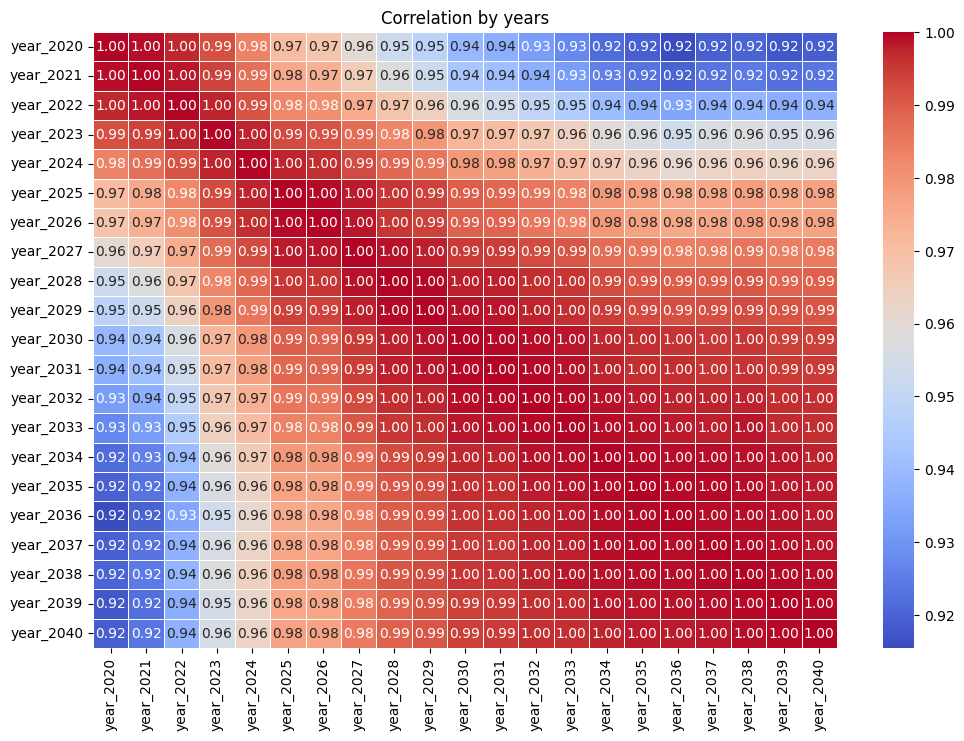

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation by years')
plt.show()

#numbers above 0

           Scenario  year_2024
27         Baseline      592.0
58   High migration      648.0
89    Low migration      558.0
120      50:50 City      628.0


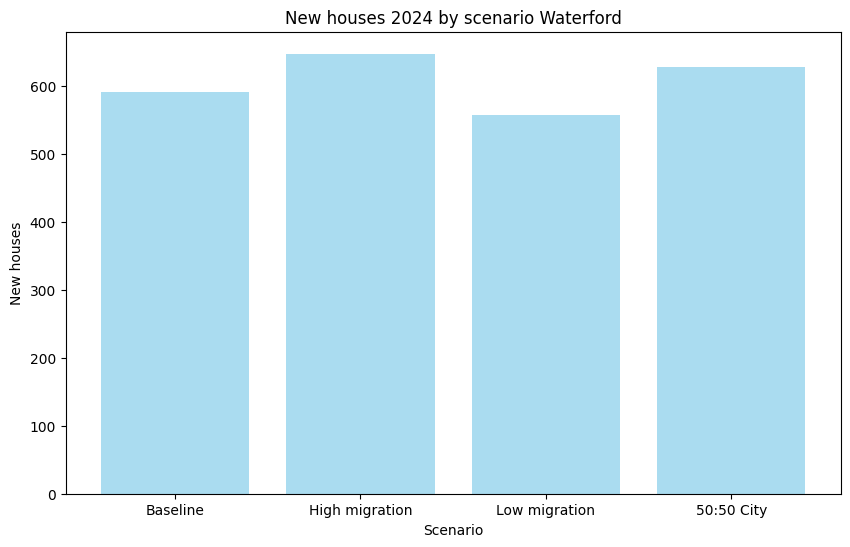

In [14]:
df_waterford_2024 = df[df['Local Authority'] == 'Waterford'][['Scenario', 'year_2024']]


print(df_waterford_2024)


plt.figure(figsize=(10, 6))


plt.bar(df_waterford_2024['Scenario'], df_waterford_2024['year_2024'], color='skyblue', alpha=0.7)


plt.title('New houses 2024 by scenario Waterford')
plt.xlabel('Scenario')
plt.ylabel('New houses')


plt.show()

           Scenario  year_2030
27         Baseline      618.0
58   High migration      710.0
89    Low migration      599.0
120      50:50 City      693.0


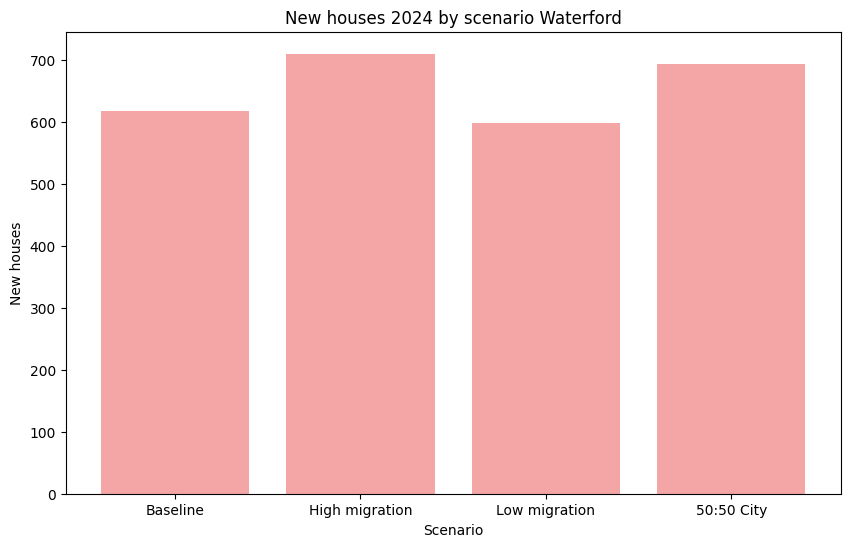

In [15]:
df_waterford_2030 = df[df['Local Authority'] == 'Waterford'][['Scenario', 'year_2030']]


print(df_waterford_2030)


plt.figure(figsize=(10, 6))


plt.bar(df_waterford_2030['Scenario'], df_waterford_2030['year_2030'], color='lightcoral', alpha=0.7)

plt.title('New houses 2024 by scenario Waterford')
plt.xlabel('Scenario')
plt.ylabel('New houses')


plt.show()

         Scenario  year_2024
2        Baseline     1408.0
3  High migration     1579.0
6   Low migration     1307.0
9      50:50 City     1660.0


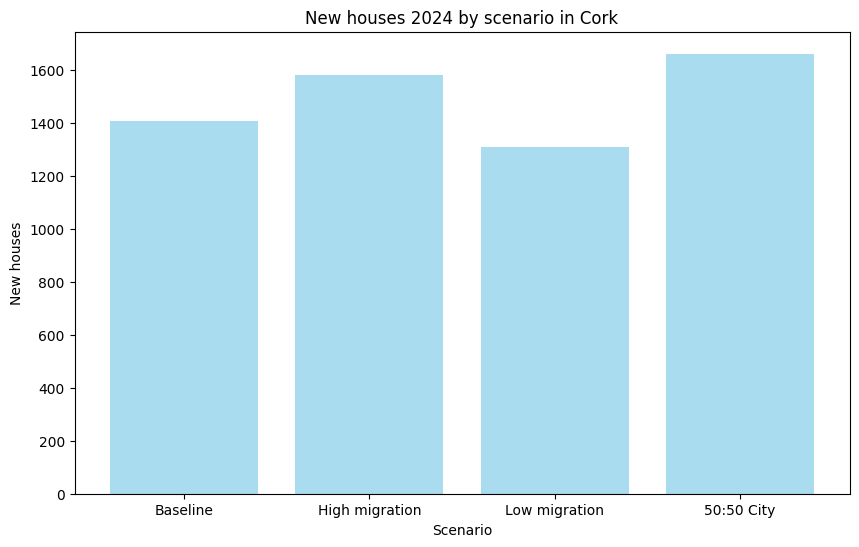

In [16]:
df_c2024 = df[df['Local Authority'] == 'Cork City'][['Scenario', 'year_2024']]


print(df_c2024)


plt.figure(figsize=(10, 6))


plt.bar(df_c2024['Scenario'], df_c2024['year_2024'], color='skyblue', alpha=0.7)


plt.title('New houses 2024 by scenario in Cork')
plt.xlabel('Scenario')
plt.ylabel('New houses')


plt.show()

         Scenario  year_2030
2        Baseline     1395.0
3  High migration     1669.0
6   Low migration     1352.0
9      50:50 City     1725.0


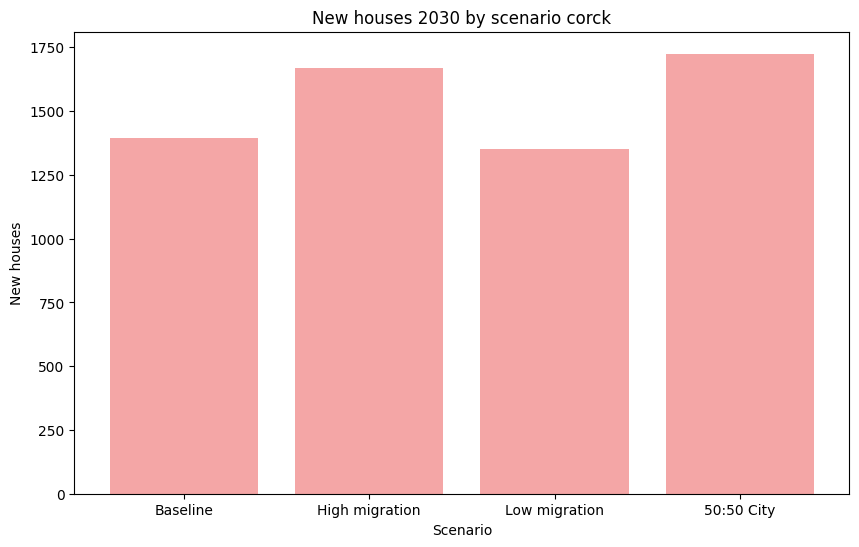

In [17]:
df_c2030 = df[df['Local Authority'] == 'Cork City'][['Scenario', 'year_2030']]


print(df_c2030)


plt.figure(figsize=(10, 6))


plt.bar(df_c2030['Scenario'], df_c2030['year_2030'], color='lightcoral', alpha=0.7)

plt.title('New houses 2030 by scenario corck')
plt.xlabel('Scenario')
plt.ylabel('New houses')


plt.show()

In [18]:
df.to_csv('processed_data.csv', index=False)